<a href="https://colab.research.google.com/github/OscarTMa/04-Computer_Vision/blob/main/DLintel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook should be useful for teaching computer vision concepts using a Kaggle dataset, demonstrating how to download data, prepare datasets, build and train a convolutional neural network model, and evaluate and visualize the model's performance.

In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [6]:
# Install Kaggle API if not already installed
!pip install -q kaggle

##Explanation:

* **Importing Libraries**: We import TensorFlow, Keras, and Matplotlib. We also import additional modules for file handling and datasets.
* **Installing Kaggle API**: We install the Kaggle API to download datasets directly from Kaggle.

In [7]:
# Download the dataset from Kaggle
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 97% 337M/346M [00:07<00:00, 38.8MB/s]
100% 346M/346M [00:07<00:00, 50.5MB/s]


## Explanation:

* **Downloading the Dataset:** We use the Kaggle API to download the "Intel Image Classification" dataset.
* **Unzipping the Dataset**: We unzip the downloaded file and extract its contents into the data folder.
python


In [8]:
# Unzip the dataset
with zipfile.ZipFile('intel-image-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

##Explanation:

* **Defining Directories:** We specify the paths to the training and validation directories where the images are stored.

In [9]:
# Define directories
train_dir = os.path.join('data/seg_train/seg_train')
validation_dir = os.path.join('data/seg_test/seg_test')

##Explanation:

* **Loading Datasets**: We use ` image_dataset_from_directory`  to load images from the training and validation directories. This converts the images into a TensorFlow dataset with a specified image size of 150x150 pixels and a batch size of 32.

In [10]:
# Load datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32
)


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


##Explanation:

* **Building the Model**: We create a sequential model using Keras.
 * `Rescaling(1./255)`: Normalizes the images so their values are between 0 and 1.
 * `Conv2D and MaxPooling2D`: Add convolutional and max-pooling layers to extract features from the images.
 * `Flatten()`: Flattens the output of the convolutional layers into a single dimension.
 * `Dense`: Adds fully connected dense layers. The last layer uses `softmax` to classify images into one of six categories.

In [11]:
# Build the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')
])

##Explanation:

* **Compiling the Model**: We configure the model with the Adam optimizer and the `sparse_categorical_crossentropy` loss function, which is suitable for multi-class classification. We use `accuracy` as the evaluation metric.

##Explanation:

* **Training the Model**: We train the model with the training dataset and validate its performance with the validation dataset over 10 epochs.

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)


Epoch 1/10
439/439 [==============================] - 761s 2s/step - loss: 1.0017 - accuracy: 0.5986 - val_loss: 0.9461 - val_accuracy: 0.6533
Epoch 2/10
439/439 [==============================] - 758s 2s/step - loss: 0.6600 - accuracy: 0.7555 - val_loss: 0.6506 - val_accuracy: 0.7643
Epoch 3/10
439/439 [==============================] - 797s 2s/step - loss: 0.5183 - accuracy: 0.8087 - val_loss: 0.5827 - val_accuracy: 0.7917
Epoch 4/10
439/439 [==============================] - 757s 2s/step - loss: 0.4248 - accuracy: 0.8442 - val_loss: 0.4966 - val_accuracy: 0.8273
Epoch 5/10
439/439 [==============================] - 754s 2s/step - loss: 0.3590 - accuracy: 0.8719 - val_loss: 0.5304 - val_accuracy: 0.8283
Epoch 6/10
439/439 [==============================] - 757s 2s/step - loss: 0.2774 - accuracy: 0.9009 - val_loss: 0.5986 - val_accuracy: 0.8273
Epoch 7/10
439/439 [==============================] - 770s 2s/step - loss: 0.2183 - accuracy: 0.9236 - val_loss: 0.6791 - val_accuracy: 0.8203

##Explanation:

* **Evaluating the Model**: We evaluate the model using the validation dataset and print the test accuracy.

94/94 - 44s - loss: 0.8904 - accuracy: 0.8113 - 44s/epoch - 469ms/step

Test accuracy: 0.8113333582878113


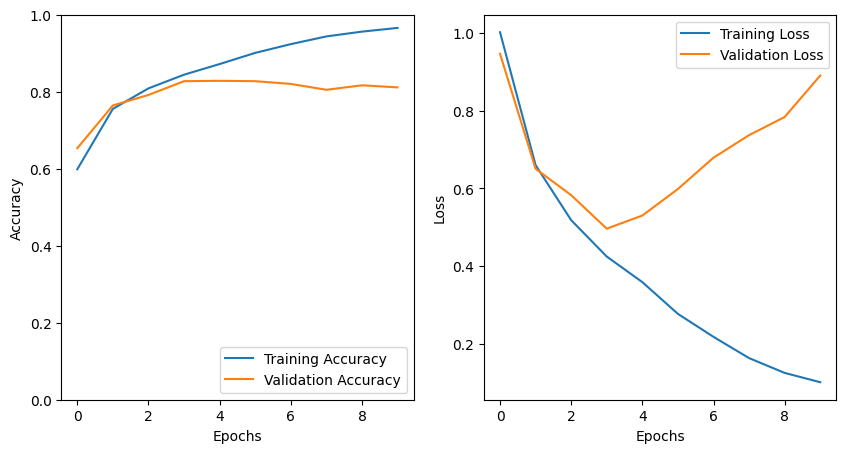

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_dataset, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


##Explanation:

* **Plotting Results**:
 * We create a figure with two subplots.
 * In the first subplot, we plot training and validation accuracy over the epochs.
 * In the second subplot, we plot training and validation loss over the epochs.
 * We add labels and legends for better visual interpretation of the results.